<a href="https://colab.research.google.com/github/mahault/Multi-agent-sustainability/blob/main/Sust_AIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sustainability under AIF - simulation**

*Mahault Albarracin, Maria Raffa*

In order to deal with sustainability in a very straightforward way, i.e. an agent is able to sustain itself by learning how to use the resources at its disposal wisely, we could think of a simple model:
an agent that is in a certain place and has to decide whether or not to eat food that is in the same place at different time steps. And learns how to not waste it over time.
In this sense, the agent acts in a sustainable way because it learns that it does not have to satisfy its greed immediately, even if it is very hungry, because the aim is to maintain a balance between itself and the environment (i.e. a room with food) as long as possible over time. In this case, it learns to align available resources with its needs.

We start by assuming the agent is aware of its own location and knows that food is in the same location as it is as well. So we do not need self location as obs.



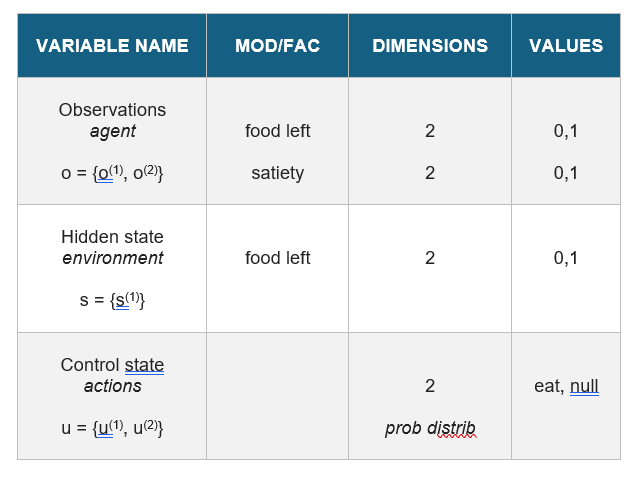

In [ ]:
# Import necessary libraries
!pip install inferactively-pymdp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.9 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymdp
from pymdp.agent import Agent #
from pymdp import inference, control, learning
from pymdp import utils, maths


:
## **1. Environment**
Dimensionalities of the hidden state factors and the control states

In [ ]:
""" Define dimensionalities of the hidden state factors and control state factors """ #my hidden state: 1 (food left[0,1])
num_states = [1, 1] # a list of dimensionalities of the hidden state factor
num_factors = len(num_states) # the total number of hidden state factors

num_controls = [2, 2] # a list of the dimensionalities of each control state factor. my control states: 2 (eat, do not eat)
num_control_factors = len(num_controls) # the total number of control states factors

In [ ]:
num_factors

2

In [ ]:
num_states

[1, 1]

In [ ]:
B = utils.initialize_empty_B(num_states, num_controls)

B[0].shape #just 1 room and 2 actions

(1, 1, 2)

In [ ]:
B[1].shape

(1, 1, 2)

## **2. Matrix A**

*2.1 Matrix A from Heins' nb multi-armed*

Let's start with a **single observation modality**, i.e. food left

#what about obs satiety? How do we add it?

In [ ]:
num_obs = [3] #only 1 obs
num_modalities = len(num_obs)

A = utils.initialize_empty_A(num_obs, num_states)
A_food_left_dims = num_obs + num_states

In [ ]:
num_modalities

1

In [ ]:
A_food_left_dims

[3, 1, 1]

In [ ]:
A[0].shape

(3, 1, 1)

In [ ]:
#is it the correct way to populate it?

A[0][0,:,0] = np.eye(1)

#A[0][1,:,1] = np.eye(1)

#A[0][2,:,2] = np.eye(1)

Filling out the entries

In [ ]:
np.eye(1)

array([[1.]])

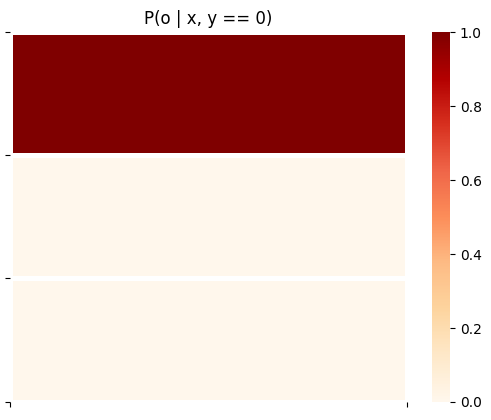

In [ ]:
utils.plot_likelihood(A[0][:,:,0], title = "P(o | x, y == 0)") #title? meaning?

In [ ]:
#utils.plot_likelihood(A[0][:,:,1], title = "P(o | x, y == 1)" )

*2.2 OR from pymdp paper*

In [ ]:
#create a simple model with 1 hidden state factor and 1 observation modality
n_obs = 3 #food_left
n_states = 3
A = utils.obj_array(1)

In [ ]:
A.shape

(1,)

In [ ]:
#This is just with 1 obs, but we have 2
A[0] = np.array ([[1.0, 0.0, 0.0] ,
                  [0.0, 1.0, 0.0] ,
                  [0.0, 0.0, 1.0]])

In [ ]:
#introduce uncertainty into the hidden state
food_left = 0.5
A[0][:,2] = maths.softmax(food_left* A[0] [:,2])

In [ ]:
#utils.plot_likelihood(A[0][:,2], title = "foo" ) #cannot plot since is 2D

## **3. Matrix B**


*3.1 From Heins' nb multi-armed*

In [ ]:
""" Build an object array for storing the factor-specific B matrices """
#B = utils.initialize_empty_B(num_states, num_controls) #transition model

In [ ]:
#B[0].shape #1 location, 2 control states (eat, do not eat)

In [ ]:
#B #empty, to be filled in

In [ ]:
#for f, ns in enumerate(num_states):

 # """ Initialize the B matrix for this factor """
  #B[f] = np.zeros((ns, ns, num_controls[f]))

#EAT
#B[f][ , , 0] = 1.0
#B[f][ , , ] =

#DO NOT EAT
#B[f][:, : , 1] = np.eye(ns)

*3.2 From pymdp paper*

## As above, this considers 1 obs (food_left). What about obs satiety? How do we add it?

In [ ]:
# create a simple transition model with two possible actions

B = utils.obj_array (1)
B[0] = np.zeros ((3, 3, 2)) #n_obs = 3 (we're considering obs food_left for 3 dim); n_states = 3 (only 1 hidden stats); control state = 2 (eat, do not)


# EAT leads to state with certainty: food_left = 0
B [0][: ,: ,0] = np. array ([[0.0 , 0.0 , 0.0] ,
                             [0.0 , 0.0 , 0.0] ,
                             [1.0 , 1.0 , 1.0]])

# DO NOT EAT leads to first 2 states with uncertainty

B [0][: ,: ,1] = np. array ([[0.5 , 0.5 , 0.5] ,
                             [0.5 , 0.5 , 0.5] ,
                             [0.0 , 0.0 , 0.0]])


In [ ]:
B

array([array([[[0. , 0.5],
               [0. , 0.5],
               [0. , 0.5]],

              [[0. , 0.5],
               [0. , 0.5],
               [0. , 0.5]],

              [[1. , 0. ],
               [1. , 0. ],
               [1. , 0. ]]])], dtype=object)

In [ ]:
B[0].shape

(3, 3, 2)

In [ ]:
B.sum(axis = 0)

array([[[0. , 0.5],
        [0. , 0.5],
        [0. , 0.5]],

       [[0. , 0.5],
        [0. , 0.5],
        [0. , 0.5]],

       [[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ]]])

Plot the B matrix

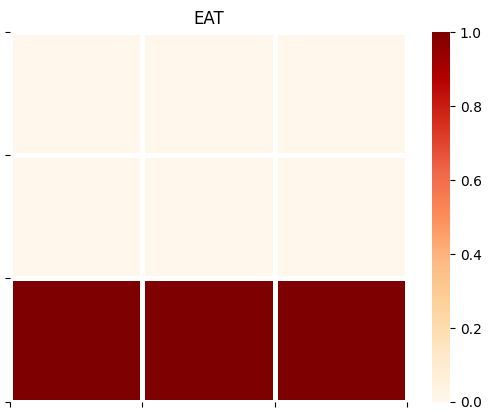

In [ ]:
utils.plot_likelihood(B[0][:,:,0], title = 'EAT') # eat will bring to smth certain: food_left = 0

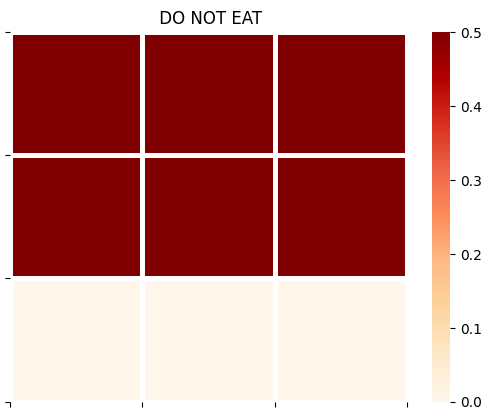

In [ ]:
utils.plot_likelihood(B[0][:,:,1], title = ' DO NOT EAT') #this action takes more uncertainty: the agent is not sure what's gonna happen if it does not eat

## **4. Vectors C - D**

From pymdp paper

In [ ]:
#specify prior preferences (C vector)
C = utils.obj_array_uniform([n_obs]) #specified where?
C

array([array([0.33333333, 0.33333333, 0.33333333])], dtype=object)

In [ ]:
C.shape

(1,)

In [ ]:
#plot?
#utils.plot_beliefs(softmax(C[1]), title = "Prior preferences") softmax?

In [ ]:
#specify prior over hidden states (D vector)
D = utils.obj_array(1)
D[0] = utils.onehot(1, n_states)
D

array([array([0., 1., 0.])], dtype=object)

In [ ]:
D.shape

(1,)

In [ ]:
#plot?
#utils.plot_beliefs(softmax(D[0]), title = "Prior beliefs about probability of the two contexts")

In [ ]:
# instantiate the agent
my_agent = Agent (A=A, B=B, C=C, D=D)

## **5. Generative model**

*5.1 From pymdp paper*

In [ ]:
# write a simple environment class, where state depends on the action
# probabilistically and observation is deterministic function of the state
# except for state 2, where it’s randomly sampled %%

from pymdp.envs import Env

In [ ]:
# sub - class it from the base Env class

*5.2 From Heins'paper*
Specify dimensionalities

In [ ]:
 #hidden state
s_food_left = [0, 1] #wrong values?

""" Define `num_states` and `num_factors` below """
num_states = [len(s_food_left)]
num_factors = len(num_states)

#control states
action1 = ['Do not eat']
action2 = ['Eat']

""" Define `num_controls` below """
num_controls = [len(action1), len(action2)]

#observations
obs_food = ['0', '1']   #wrong values, should take a float
obs_satiety = ['0', '1']   #wrong values, should take a float

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(obs_food), len(obs_satiety)]
num_modalities = len(num_obs)

In [ ]:
num_states

[2]

In [ ]:
num_controls

[1, 1]

In [ ]:
num_obs

[2, 2]

Create the A array

In [ ]:
#generate the A array
A = utils.initialize_empty_A(num_obs, num_states)

In [ ]:
A[0]

array([[0., 0.],
       [0., 0.]])

Fill out food left observation

In [ ]:
#NOT WORKING - TO BE REVISED

#accuracy of the obs food left
p_food = 0.7 #? how much the agent trusts the obs of food left?

A_food = np.zeros(len(num_controls), len(s_food_left)) #np.zero takes float

for food_id, s_food_left_value in enumerate(s_food_left):

  if s_food_left_value == '0':
    A_food[0,:,food_id] = 1.0

  elif s_food_left_value == '1':
    A_food[1:,:,food_id] = np.array([[p_food, 1.0 - p_food],
                                   1.0 - p_food, p_food])

  A[0] = A_food

TypeError: Cannot interpret '2' as a data type

AttributeError: 'builtin_function_or_method' object has no attribute 'show'

In [ ]:
#NOT WORKING - TO BE REVISED

utils.plot_likelihood(A[0][:,:,1], title = "Probability of the two hint types, for the two game states")

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Fill out satiety observation

In [ ]:
#NOT WORKING - TO BE DONE

p_reward = 0.8 # probability of getting a rewarding outcome, if you are sampling the more rewarding bandit

A_reward = np.zeros((len(reward_obs_names), len(context_names), len(choice_names)))

for choice_id, choice_name in enumerate(choice_names):

  if choice_name == 'Start':

    A_reward[0,:,choice_id] = 1.0

  elif choice_name == 'Hint':

    A_reward[0,:,choice_id] = 1.0

  elif choice_name == 'Left Arm':

    A_reward[1:,:,choice_id] = np.array([ [1.0-p_reward, p_reward],
                                        [p_reward, 1.0-p_reward]])
  elif choice_name == 'Right Arm':

    A_reward[1:, :, choice_id] = np.array([[ p_reward, 1.0- p_reward],
                                         [1- p_reward, p_reward]])

A[1] = A_reward

In [ ]:
#DOES NOT WORK TO BE DONE

utils.plot_likelihood(A[1][:,:,2], title='Payoff structure if playing the Left Arm, for the two contexts')

### Let's wrap that all into a single function so we can quickly re-set or re-parameterize the A array as needed

## **Previous random attempts**

In [ ]:
#for me is just: eat, do not eat
#  """Initialize the B matrix for this factor """
# for f, ns in enumerate(num_states):
#   B[f] = np.zeros( (ns, ns, num_controls[f]))
## create a simple transition model with two possible actions

#EAT
B = utils.obj_array(1)
B[0] = np.zeros((3, 3, 2))

#DO NOT EAT


In [ ]:
 # introduce uncertainty into one of the hidden states
 inv_temperature = 0.5
 A [0][: ,2] = maths . softmax ( inv_temperature * A [0][: ,2])

In [ ]:
A, B, C, D, = ... #set up the generative model
my_agent = Agent (A=A, B=B, C=C, D=D)

In [ ]:
sc_env = SearchEnv(starting_loc = 'start', scene_name = )

In [ ]:
task_env = myCustomEnv() #set up generative process or environment. generare il mio?

In [ ]:
#one time step of active inference
#observation = task_env.reset()
#qs = my_agent.infer_states(observation)
#q_pi = my_agent.infer_policies()
#chosen_action = my_agent.sample_action

In [ ]:
#get the observation given the action
#next_observation = task_env.step(chosen_action)

**1. MDP** - but we have to do PO

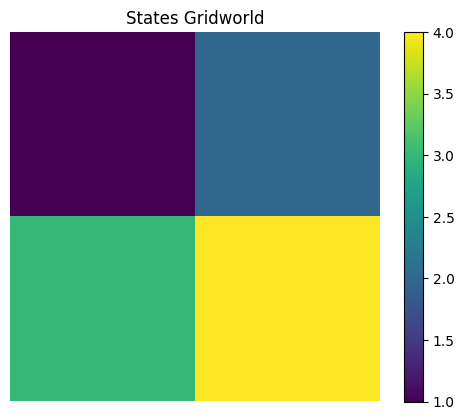

In [ ]:
states = np.linspace(1,4,4).reshape(2,2)
#print(states)

plt.imshow(states, cmap='viridis')
plt.colorbar()
plt.axis('off')
plt.title('States Gridworld')
plt.show()

**2. Action space.** The agent move across the environment to collect rewards = find resources. There are 4 actions: move north, east, south or west

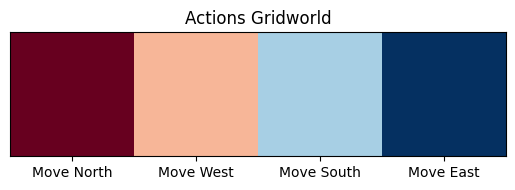

In [ ]:
actions = np.linspace(1,4,4).reshape(1,4)
#rint(actions)

plt.imshow(actions, cmap='RdBu')
plt.yticks([])
plt.xticks(np.arange(4), ['Move North', 'Move West', 'Move South','Move East'])
plt.title('Actions Gridworld')
plt.show()

**PYMDP**